# Preços do mercado aéreo turco desde 2013

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/cleanThy.csv')
df.head()

,Date,Last Price,Lowest Price,Highest Price,Volume
0,18 Haziran 2019,13.22,13.02,13.28,851977943
1,17 Haziran 2019,13.02,12.62,13.05,824603822
2,14 Haziran 2019,12.68,12.56,12.86,742553611
3,13 Haziran 2019,12.65,12.64,12.93,649793915
4,12 Haziran 2019,12.95,12.92,13.15,820195573


# TRATAMENTO

In [3]:
df.shape

(1502, 5)

In [4]:
np.unique(df.isna().to_numpy(),return_counts=True)

(array([False]), array([7510]))

Como não existe nenhum valor faltante no banco, não será necessária o tratamento desses valores. Porém, caso existisse, seria adotado a substituição dos valores faltantes pela média para as variáveis numéricas e da mediana para variáveis categóricas. A variável data seria analisada de forma mais minuciosa, para observar um padrão e se não existe nenhum dia ou mês faltante nas observações e que encaixaria na observação, pós essa análise, caso não faça muito sentido, seria colocada também a mediana.

Antes de tudo, como o dataset se trata de valores da ação do mercado de aviões na turquia e cada observação seria um dia do mês de cada ano, normalizaremos as observações para obter uma melhor análise e visualização.

In [5]:
df_normalized = df.select_dtypes(np.number).copy() #separando as colunas numéricas para normalização

In [6]:
# UTILIZAREMOS O MÉTODO DO MÁXIMO E MÍNIMO, TAMBÉM UTILIZADO PELA BIBLIOTECA SKLEARN

def normalize():
  for column in df_normalized.columns:
    df_normalized[column] = (df_normalized[column] - df_normalized[column].min())/(df_normalized[column].max() - df_normalized[column].min())

normalize()

In [7]:
df_normalized.tail()

,Last Price,Lowest Price,Highest Price,Volume
1497,0.229194,0.238446,0.227034,0.025549
1498,0.233157,0.238446,0.228346,0.026360
1499,0.237120,0.239786,0.228346,0.028886
1500,0.229194,0.237106,0.224409,0.026784
1501,0.230515,0.235767,0.229659,0.058185


In [8]:
# PARA CRIAR A COLUNA DATA E ANALISARMOS ANOS, MESES E OS DIAS, VAMOS PRECISAR FAZER ALGUMAS MUDANCAS:
df['Date'] = df['Date'].str.replace('Ocak','1')
df['Date'] = df['Date'].str.replace('Şubat','2')
df['Date'] = df['Date'].str.replace('Mart','3')
df['Date'] = df['Date'].str.replace('Nisan','4')
df['Date'] = df['Date'].str.replace('Mayıs','5')
df['Date'] = df['Date'].str.replace('Haziran','6')
df['Date'] = df['Date'].str.replace('Temmuz','7')
df['Date'] = df['Date'].str.replace('Ağustos','8')
df['Date'] = df['Date'].str.replace('Eylül','9')
df['Date'] = df['Date'].str.replace('Ekim','10')
df['Date'] = df['Date'].str.replace('Kasım','11')
df['Date'] = df['Date'].str.replace('Aralık','12')
df['Date'] = df['Date'].str.replace(' ','-')

In [9]:
df['Date'] = df['Date'].str.rstrip('-') #RETIRANDO O ULTIMO - PARA TRANSFORMAR EM DATA
df.head()

,Date,Last Price,Lowest Price,Highest Price,Volume
0,18-6-2019,13.22,13.02,13.28,851977943
1,17-6-2019,13.02,12.62,13.05,824603822
2,14-6-2019,12.68,12.56,12.86,742553611
3,13-6-2019,12.65,12.64,12.93,649793915
4,12-6-2019,12.95,12.92,13.15,820195573


In [10]:
df_normalized['Date'] = df['Date']
df_normalized.head()

,Last Price,Lowest Price,Highest Price,Volume,Date
0,0.567371,0.567984,0.557743,0.312177,18-6-2019
1,0.554161,0.541192,0.542651,0.301931,17-6-2019
2,0.531704,0.537173,0.530184,0.271219,14-6-2019
3,0.529723,0.542532,0.534777,0.236498,13-6-2019
4,0.549538,0.561286,0.549213,0.300281,12-6-2019


In [11]:
df_normalized['Date'] = pd.to_datetime(df['Date'],dayfirst= True) # ESSA FUNCAO PERMITE QUE MOSTREMOS A FORMA QUE A DATA ESTÁ NO DATASET
df_normalized['Date'].head()

0   2019-06-18
1   2019-06-17
2   2019-06-14
3   2019-06-13
4   2019-06-12
Name: Date, dtype: datetime64[ns]

In [12]:
df_normalized['Year'] = pd.DatetimeIndex(df_normalized['Date']).year # DEFININDO AS VARIAVEIS
df_normalized['Month'] = pd.DatetimeIndex(df_normalized['Date']).month 
df_normalized['Day'] = pd.DatetimeIndex(df_normalized['Date']).day 

df_normalized.head()

,Last Price,Lowest Price,Highest Price,Volume,Date,Year,Month,Day
0,0.567371,0.567984,0.557743,0.312177,2019-06-18,2019,6,18
1,0.554161,0.541192,0.542651,0.301931,2019-06-17,2019,6,17
2,0.531704,0.537173,0.530184,0.271219,2019-06-14,2019,6,14
3,0.529723,0.542532,0.534777,0.236498,2019-06-13,2019,6,13
4,0.549538,0.561286,0.549213,0.300281,2019-06-12,2019,6,12


Agora, depois do tratamento do banco, vamos às análises

# ANÁLISES

In [36]:
# 3 PREÇOS - primeiro, vamos juntar os tres precos em uma só coluna e fazer os gráficos

preco_baixo = pd.DataFrame(data=df_normalized[' Lowest Price'])
preco_alto = pd.DataFrame(data=df_normalized[' Highest Price'])
preco_atual = pd.DataFrame(data=df_normalized[' Last Price'])

preco_atual.head()

,Last Price
0,0.567371
1,0.554161
2,0.531704
3,0.529723
4,0.549538


In [37]:
preco_baixo['Classe'] = 'Preço mais baixo'
preco_alto['Classe'] = 'Preço mais alto'
preco_atual['Classe'] = 'Último preço'

preco_baixo.columns = ['Preço','Classe']
preco_alto.columns = ['Preço','Classe']
preco_atual.columns = ['Preço','Classe']

preco_atual.head()

,Preço,Classe
0,0.567371,Último preço
1,0.554161,Último preço
2,0.531704,Último preço
3,0.529723,Último preço
4,0.549538,Último preço


In [40]:
df_precos = preco_baixo.append(preco_alto)
df_precos = df_precos.append(preco_atual)

df_precos.shape

(4506, 2)

[Text(0, 0.5, 'Preço'), Text(0.5, 0, 'Classe do preço')]

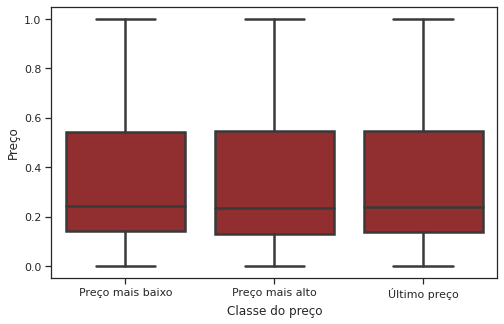

In [41]:
## utilizaremos o seaborn para a análise gráfica, talvez colocarei algumas coisas do matplotlib, já que são bibliotecas 'parceiras'

#colocando settings importantes:
sns.set(rc={'figure.figsize':(8,5)})
sns.set_style('ticks')

#criando o gráfico boxplot
fig = sns.boxplot(x='Classe',y = 'Preço', color = '#A11D21', linewidth=2.5, data = df_precos)

fig.set(xlabel='Classe do preço', ylabel='Preço') #definindo as legendas
# inverti os eixos X e Y para deixar o nome dos países legíveis e coloquei uma cor vermelha para todas as regiões

Como pudemos ver, não há grande mudança entre os preços do dia, então, se o valor da ação amanhece em um valor X, ele não tende a variar muito.

Agora, serão feitas três análises: o preço mais alto com todos os três parâmetros de data, para vermos como está distribuido o preço com o tempo em anos (se teve algum ano que se prevaleceu), em meses (se há um mês que as ações supervalorizaram) e a mesma coisa em dias.

In [42]:
df_normalized.head()

,Last Price,Lowest Price,Highest Price,Volume,Date,Year,Month,Day
0,0.567371,0.567984,0.557743,0.312177,2019-06-18,2019,6,18
1,0.554161,0.541192,0.542651,0.301931,2019-06-17,2019,6,17
2,0.531704,0.537173,0.530184,0.271219,2019-06-14,2019,6,14
3,0.529723,0.542532,0.534777,0.236498,2019-06-13,2019,6,13
4,0.549538,0.561286,0.549213,0.300281,2019-06-12,2019,6,12


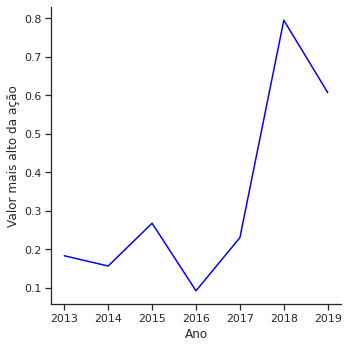

In [51]:
# ANO X PREÇO MAIS ALTO

sns.set_style('ticks')

fig = sns.relplot(x='Year',y = ' Highest Price', kind = 'line', color = 'blue', data = df_normalized, ci = None)
fig.set(xlabel='Ano', ylabel='Valor mais alto da ação') 

Como vemos, depois de 2017, o mercado de ações aéreas da Turquia teve um grande crescimento no seu valor

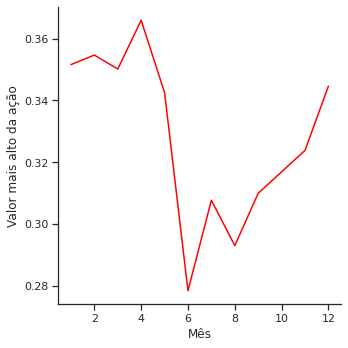

In [50]:
# MES X PREÇO MAIS ALTO

sns.set_style('ticks')
fig = sns.relplot(x='Month',y = ' Highest Price', kind = 'line', color = 'red', data = df_normalized, ci = None)
fig.set(xlabel='Mês', ylabel='Valor mais alto da ação') 

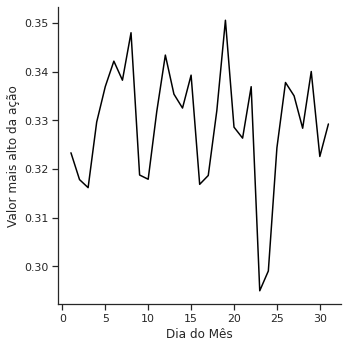

In [53]:
# DIA X PREÇO MAIS ALTO

sns.set_style('ticks')
fig = sns.relplot(x='Day',y = ' Highest Price', kind = 'line', color = 'black', data = df_normalized, ci = None)
fig.set(xlabel='Dia do Mês', ylabel='Valor mais alto da ação') 